# **TITANIC SURVIVAL PREDICTION**

### *Perform data cleaning and exploratory data analysis (EDA) on a dataset.*
### *Explore the relationships between variables and identify patterns and trends in the data.*

In [118]:
#Missingno library offers a very nice way to visualize the distribution of NaN values.
#Missingno is a Python library and compatible with Pandas.
#Importing the necessary libraries

In [119]:
import numpy as np                            # for numerical calculations ( arrays,matrices )
import pandas as pd                           # to handle data structures operations
import matplotlib.pyplot as plt               # for graphs & plots
%matplotlib inline
import seaborn as sns                         # for creating heatmap, time series plots, violin plots & so on
import matplotlib.style as style              # for changing of plots
style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import missingno as ms                        # for missing values visualization
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [120]:
df = pd.read_csv("C:\\PRODIGY_DS\\PRODIGY_DS_02\\Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Shape of the dataframe

In [121]:
df.shape

(891, 12)

### Idea about the number of rows & columns in dataset

In [122]:
print('\033[1m' + 'The number of rows in dataset is' + '\033[0m' , 
      len(df.index),  '.')
print('\033[1m' + 'The number of columns in dataset is' + '\033[0m' , 
      len(df.columns), '.')

The number of rows in dataset is 891 .
The number of columns in dataset is 12 .


### Information about the dataframe

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Description of dataset in 5 point summary format (min, 25%, 50%, 75%, max)

In [124]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for null/missing values in the dataset

In [125]:
m_val = df.isnull().sum().sort_values(ascending = False)    # m_val = missing values
m_val

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

'Observation':

There is null values in these columns:

In Age column, 177 nullvalues
In Cabin column, 687 null values
In Embarked column, 2 null values
since the cabin column is not of much use and contains a lot of null values so we will drop it.

### Percentage of missing values for each features

In [126]:
mval_per = df.isnull().sum()/df.isnull().count() * 100
df_null = pd.DataFrame({'missing values' : m_val, 'Percentage' : 
                        mval_per.sort_values(ascending = False)})
df_null.head()

,missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000


### Matrix plot to see patterns of missing values

Text(0.5, 1.0, 'Matrix plot to see patterns of missing values')

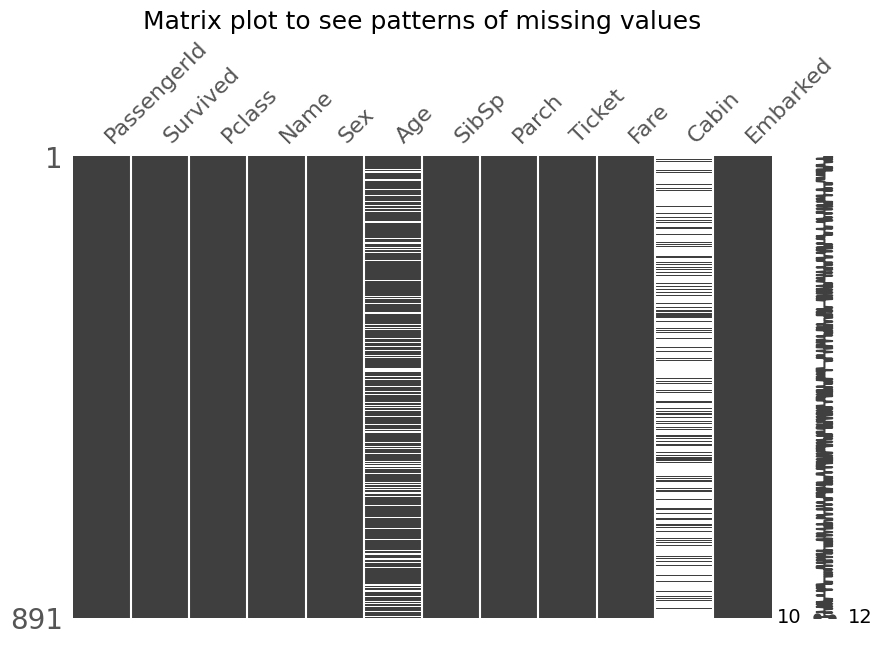

In [127]:
ms.matrix(df, figsize = (10, 6) )
plt.title("Matrix plot to see patterns of missing values", size = 18)

### Barplot to clearly see the lacking of data value

Text(0.5, 1.0, 'Barplot to clearly see the lacking of data value')

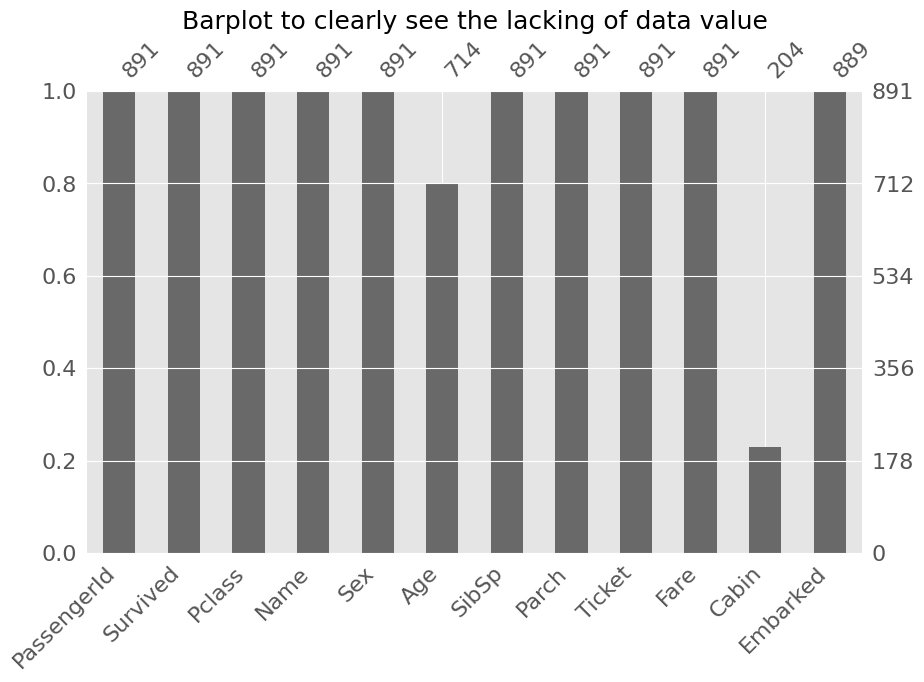

In [128]:
ms.bar(df, figsize= (10,6))
plt.title("Barplot to clearly see the lacking of data value" , size = 18) 

### Dropping unnecessary columns

In [129]:
df.head(5) # Show the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### drop the 'cabin' column from datasets as it explains the highest percentage of missing values

In [130]:
df.drop(columns = "Cabin", axis = 1, inplace = True)
df.head(5)  # when Cabin column is drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### || Replacing missing values with Mean value ||

### Filling the missing values of the age column by Mean value of the column

### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Kdeplot of Age mean Vs Density


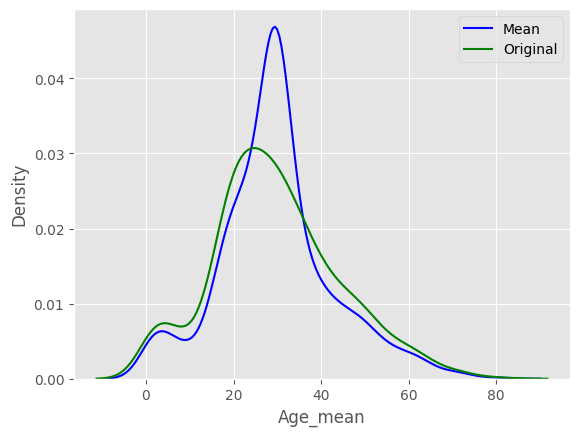

In [131]:
# First we compare between the curves for inital values and replaced-with-mean-values

df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

# Checking difference of curves between replaced and original values

sns.kdeplot(df['Age_mean'] , color = 'blue', label = 'Mean')
sns.kdeplot(df['Age'], color = 'green', label = 'Original')
print("Kdeplot of Age mean Vs Density")
plt.legend()

'observation' :

Mean is higher as compare to original.

### Filling up the spots of missing values does change the curve

In [132]:
df.drop(columns = ['Age_mean'], axis = 1, inplace = True)

# finally we replace them with mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

print("Number of missing values remained in column 'Age' of dataset is" , 
      df['Age'].isnull().sum())

Number of missing values remained in column 'Age' of dataset is 0


### Filling the missing values of the Embarked column by Mode value of the column

In [133]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Again checking for null/missing values in the dataset

In [134]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [135]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

'Observation' & 'Interface' :

Since all the missing values are treated.

### Checking for duplicate values in the dataset

In [136]:
df.duplicated().sum()

np.int64(0)

'Observation' & 'Interface' :

Since all the missing values are treated.

### Checking for duplicate values in the dataset

In [137]:
df.duplicated().sum()

np.int64(0)

'Observation' & 'Interface' :

Since there is no duplicate record.
Number of duplicated values existed in dataset is 0.

### Checking the survival of people

In [138]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### ||Analysis With Visualization||
### Visualization of survival of people
Countplot

In [139]:
# Value counts of survived or not survived passengers
pd.DataFrame({' ' : ['Not Survived' , 'Survived'] ,'Value counts' : df['Survived'].value_counts(),  'Percentage(%)' : [(df['Survived'] == 0).sum() * 100 /len(df) , (df['Survived'] == 1).sum() * 100/len(df)]}).set_index(' ').head()

,Value counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


### Counplot of Survived people vs Number of people

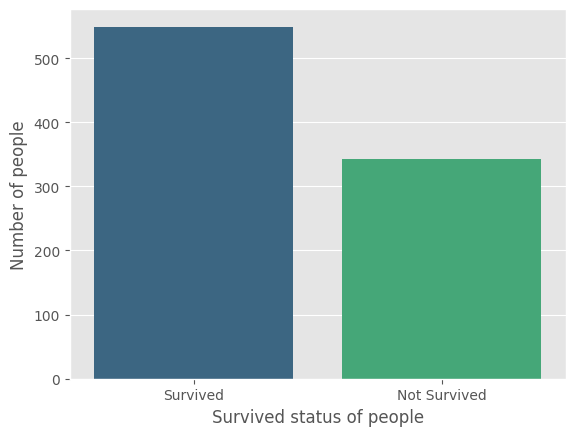

In [140]:
sns.countplot(x = 'Survived', data = df, palette = 'viridis',)
plt.xlabel("Survived status of people")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1] , labels = ['Survived','Not Survived'])
plt.show()

'observation':

Survived status of people is higher.

### Pie Chart

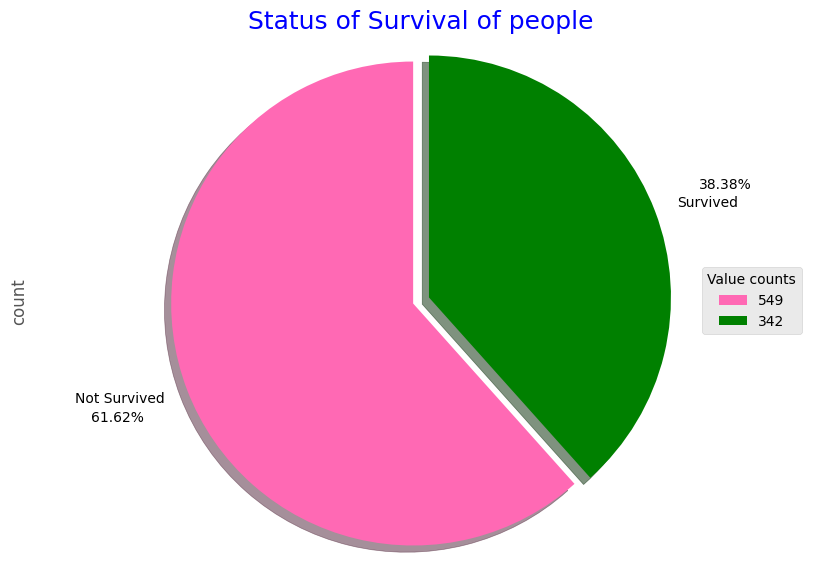

In [141]:
df['Survived'].value_counts().plot(kind = 'pie' ,figsize = (10, 7), shadow = True, startangle = 90 ,pctdistance = 1.31,
        explode = [0, 0.07], autopct = "%1.2f%%", labels = ['Not Survived', 'Survived'], colors = ['hotpink', 'green'])
plt.title('Status of Survival of people' , c = 'b' , size = 18 , y = 0.99)
plt.axis('equal')
plt.legend(title = 'Value counts' , labels = df['Survived'].value_counts(), loc= 'center right')
plt.show()

'observation' :

Only 38.38% people are Survived.
61.62% people are not Survived.

### || Visualization of survived values with respect to different features || 
### 1.Visualization of people survived from different passenger class

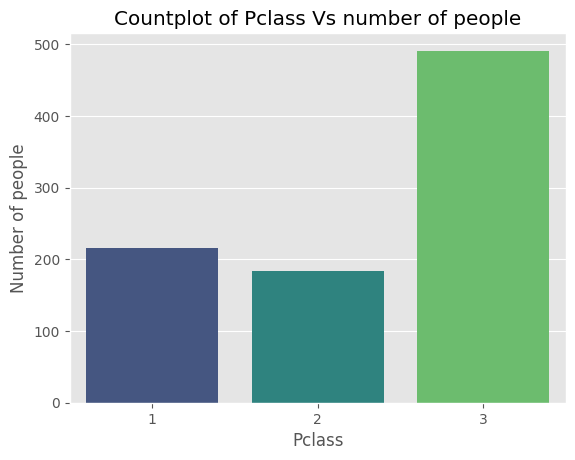

In [142]:
sns.countplot(x = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.title('Countplot of Pclass Vs number of people')
plt.show()

'observation' :

People from Pclass '3' is higher
Pclass '1' is 2nd highest
Pclass '2' is least

### 2. Visualization of Status of survived people from different passenger class

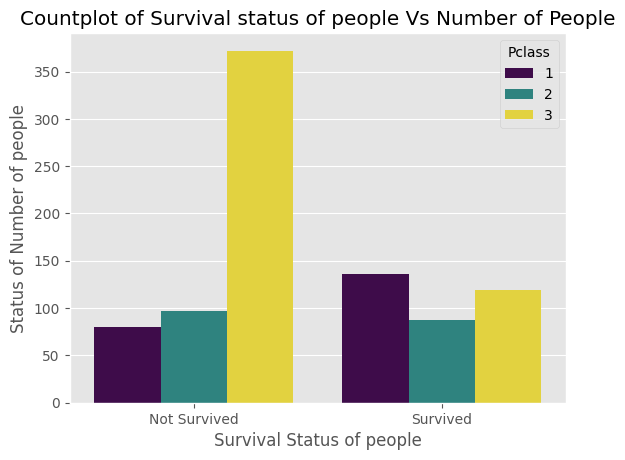

In [143]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Survival Status of people")
plt.ylabel("Status of Number of people")
plt.xticks(ticks = [0,1], labels = ['Not Survived' , 'Survived'])
plt.title('Countplot of Survival status of people Vs Number of People')
plt.show()

'observation' :

Status Of Survived on different Pclass

Pclass '1' is highest
pclass '2' least
Pclass '3' is 2nd highest
Status of Not survived on different Pclass

Pclass '3' is Highest
Pclass '2' is 2nd highest
Pclass '1' is least

### 3. Visualization of people survived from different passenger class on sex status

Catplot of status of survived people from different pclass on sex status


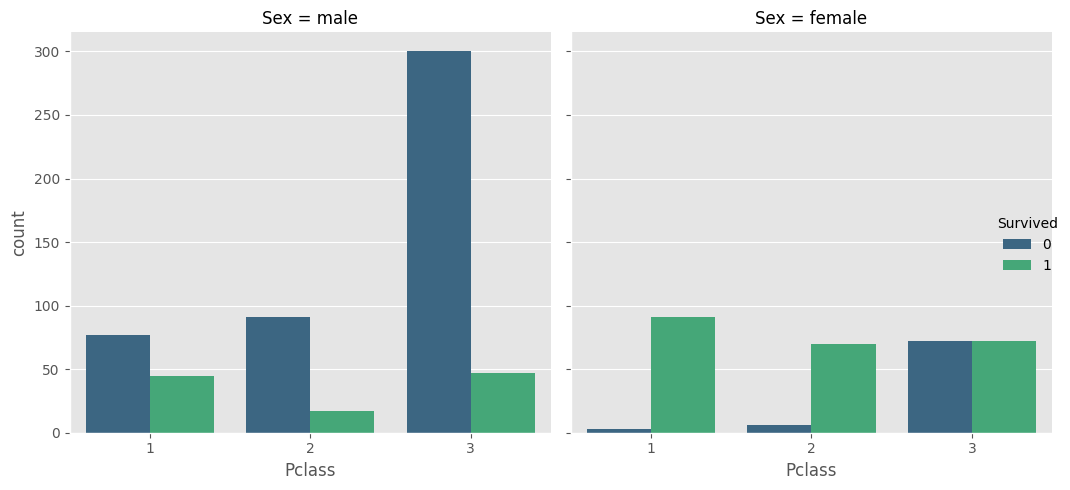

In [144]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = df,palette='viridis' )
plt.tight_layout()
print('Catplot of status of survived people from different pclass on sex status')

'Observation' :

Most people didn't survive
Though population of Pclass 3 was the highest, yet they had the least survival rate
Males from Pclass 3 had the least survival rate

### 4. Visualization of people survived from different gender

In [145]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

### 5. visualizing the population of male and female passenger

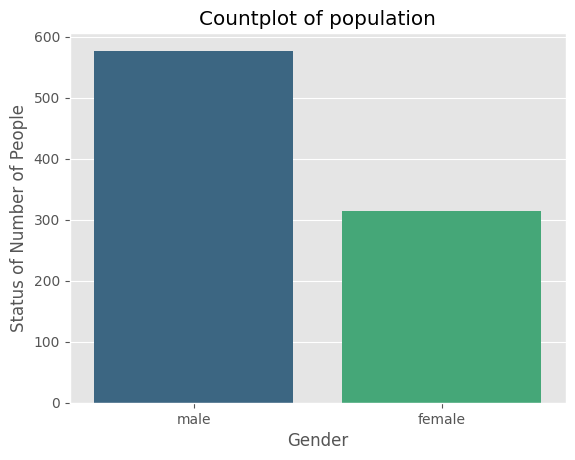

In [146]:
sns.countplot(x = 'Sex', data = df, palette = 'viridis')
plt.xlabel("Gender")
plt.ylabel("Status of Number of People")
plt.title('Countplot of population')
plt.show()

'observation' :

Male Passenger is higher as compare to Female passenger

### 6. visualizing the population of male and female passenger on status of survived or not survived

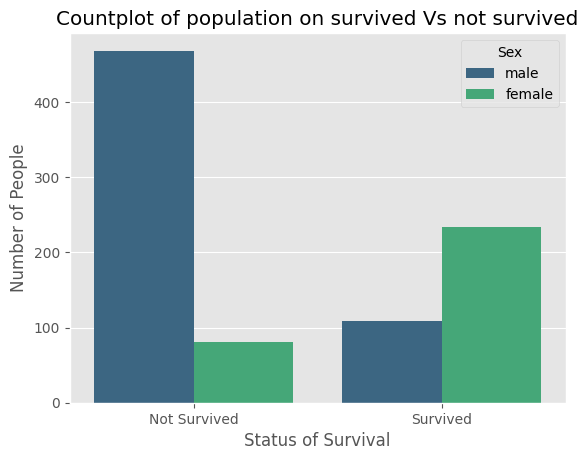

In [147]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'viridis')
plt.xlabel("Status of Survival")
plt.ylabel("Number of People")
plt.xticks(ticks = [0,1], labels = ['Not Survived', 'Survived'])
plt.title('Countplot of population on survived Vs not survived')
plt.show()

'observation' :

Male passenger are less survived as compare to female passenger on 'survived status'
Female passenger is less survived as compare to male passenger on 'not survived status'

### Label Encoder
### Changing the Sex column and Embarked column from categorical to numerical for model training
### In Machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Lbel Encoding refers to converting the labels into numeric from so as to convert it into the machine-readable form.

In [148]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


In [149]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,1,3,0,0
1,71.2833,0,1,38.000000,0,1,1,1
2,7.9250,0,0,26.000000,0,3,0,1
3,53.1000,0,1,35.000000,0,1,0,1
4,8.0500,0,0,35.000000,1,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,1,2,0,0
887,30.0000,0,0,19.000000,0,1,0,1
888,23.4500,2,1,29.699118,0,3,0,0
889,30.0000,0,0,26.000000,1,1,1,1


### Correlation

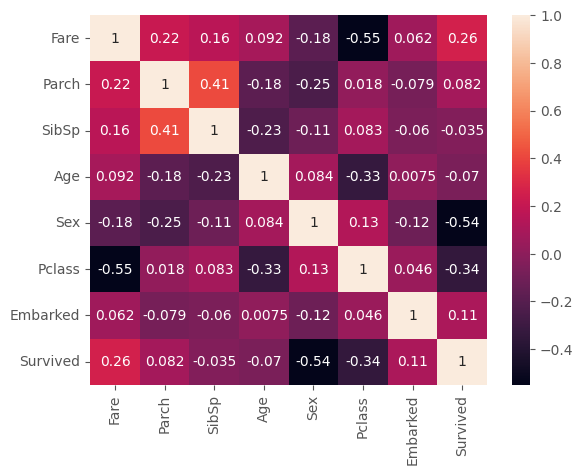

In [150]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()

# Conclusion:

Gender Disparity: The survival rate among females was significantly higher compared to males. This observation aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing women's and children's safety.

Passenger Class Disparity: Although the population of passengers in Class 3 was the highest, they had the lowest survival rate. This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.

Gender and Passenger Class Interaction: Further analysis reveals that males from Class 3 had the lowest survival rate. This suggests a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving the disaster.

Age Factor: Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.

Correlation with Survived Column: The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.

